## Project: InstaBot - II

### Description

Your friend has opened a new Food Blogging handle on Instagram and wants to get famous. 

He wants to follow a lot of people so that he can get noticed quickly but it is a tedious task so he asks you to help him.

As you have just learned automation using Selenium, you decided to help him by creating an Instagram Bot.

You need to create different functions for each task.

### NOTE : All the results were obtained the Date : 29th June, 2023 and Time: 5:34 pm

### Importing Libraries

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.select import Select
import time
import matplotlib.pyplot as plt

### Creating a Driver Session and logging in before solving any problems

In [2]:
WebService = Service(executable_path = 'D:\chromedriver_win32\chromedriver')
driver = webdriver.Chrome(service = WebService)
driver.maximize_window()

Error getting version of chromedriver 115. Retrying with chromedriver 114 (attempt 1/5)


In [3]:
def log_in(username, password) :
    instagram_link = 'https://www.instagram.com/'
    driver.get(instagram_link)
    ## waiting explicitly till the input elements load in the page
    wait = WebDriverWait(driver, 5)
    input_elements = wait.until(EC.presence_of_all_elements_located((By.TAG_NAME, 'input')))
    username_input = input_elements[0]
    password_input = input_elements[1]
    ## passing arguments
    username_input.send_keys(username)
    password_input.send_keys(password)
    ## log in button has an attribute "type = submit" so just calling the submit method on password element
    password_input.submit()
    try :
        ## waiting till "notification" appears on the screen
        wait = WebDriverWait(driver, 5)
        not_now_btn = wait.until(EC.presence_of_element_located((By.XPATH, '//button[contains(@class, "_a9_1")]')))
        not_now_btn.click()
    except :
        pass

In [4]:
log_in('Sample_Username','Sample_Password' )

## Project Flow

### Problem 1: Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.

1. From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers
    
2. Now Find the number of posts these handles have done in the previous 3 days.
    
3. Depict this information using a suitable graph.

#### 1.1 : From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [5]:
def get_top_5_handles() :
    all_profiles = search_and_get_all_handles('food')
    time.sleep(1)
    myDict = return_profile_vs_followers(all_profiles)
    myDict = sort_dict(myDict)
    myDict = dict(reversed(list(myDict.items())))
    top5 = {}
    count = 0
    for i in list(myDict.items()) :
        if count == 5 :
            break
        top5[i[0]] = i[1]
        count += 1
    return top5

In [6]:
def search_and_get_all_handles(topic) :
    ## going to main page
    instagram_link = 'https://www.instagram.com/'
    driver.get(instagram_link)
    ## finding search box
    
    wait = WebDriverWait(driver, 10)

    search_btn = wait.until(EC.presence_of_element_located((By.PARTIAL_LINK_TEXT, 'Search')))
    search_btn.click()
    search_box = driver.find_element(By.TAG_NAME, 'input')
    time.sleep(1)
    
    ## sending text to search box
    
    search_box.send_keys(topic)

    ## waiting explicitly till search result list appears
    wait = WebDriverWait(driver, 10)
    search_result_list = wait.until(EC.presence_of_element_located((By.XPATH, '//div[starts-with(@class, "x9f619 x78zum5 xdt5ytf x12dtdjy x6ikm8r x1odjw0f x4uap5 x18d9i69 xkhd6sd xh8yej3 x1iyjqo2 xocp1fn")]')))
    time.sleep(3)
    ## Parsing the element HTML to get profile link list
    search_result_list_html_object = BeautifulSoup(search_result_list.get_attribute('outerHTML'), 'html.parser')
    all_profile_links = search_result_list_html_object.find_all('a')
    
    ## calling function
    extract_profile_links_from_elements(all_profile_links)
    
    if len(all_profile_links) >= 10 :
        all_profile_links = all_profile_links[0 : 10]    
    
    return all_profile_links

In [7]:
def extract_profile_links_from_elements(all_profile_links) :
    for i in range(len(all_profile_links)) :
        profile = all_profile_links[i]
        link = 'https://www.instagram.com' + profile.get('href')
        all_profile_links[i] = link

In [8]:
def get_follower_count(followers_element) :
    notation = {'K' : 1000, 'M' : 1000000, 'B' : 1000000000}
    followers_displayed = followers_element.text
    followers_displayed = followers_displayed.replace(',', '')
    number_notation = followers_displayed[-1]
    if number_notation not in notation :
        return int(float(followers_displayed))
    else :
        number = followers_displayed[0 : len(followers_displayed) - 1]
        number = float(number)
    followers_count = number * notation[number_notation]
    return int(followers_count)

In [9]:
def return_profile_vs_followers(all_top_profiles) :
    profile_vs_followers_dict = dict()
    for profile in all_top_profiles :
        driver.get(profile)
        wait = WebDriverWait(driver, 5)
        followers_element = wait.until(EC.presence_of_element_located((By.XPATH, '//a/span[starts-with(@class, "_ac2a")]')))
        follower_count = get_follower_count(followers_element)
        accountName = get_account_name(profile)
        
        profile_vs_followers_dict[accountName] = follower_count
    
    return profile_vs_followers_dict

In [10]:
def get_account_name(profile_link) :
    return profile_link.split('/')[-2]

In [11]:
def sort_dict(myDict) :
    keys = list(myDict.keys())
    values = list(myDict.values())
    sorted_value_index = np.argsort(values)
    sorted_dict = {keys[i]: values[i] for i in sorted_value_index}
    return sorted_dict

#### Calling Function

In [12]:
top_5_handles_vs_followers = get_top_5_handles()

In [13]:
top_5_handles_vs_followers
top_5_handles = list(top_5_handles_vs_followers.keys())

#### 1.1: Output

In [14]:
print('Profile : Followers', end = '\n\n')
for key in top_5_handles_vs_followers :
    print(key, ':' ,top_5_handles_vs_followers[key])

Profile : Followers

dilsefoodie : 1100000
funfoodandfrolic : 483000
bbuzzz08 : 348000
foodtalkindia : 309000
food : 182000


#### 1.2: Now Find the number of posts these handles have done in the previous 3 days. 

In [15]:
def make_links(profiles) :
    for i in range(len(profiles)) :
        profile = profiles[i]
        link = 'https://www.instagram.com/' + profile + '/'
        profiles[i] = link

In [16]:
def get_profile_vs_posts(profiles) :
    profile_vs_posts = dict()
    for profile in profiles :
        time.sleep(1)
        post_count = get_post_count(profile)
        name = get_account_name(profile)
        
        profile_vs_posts[name] = post_count
    
    return profile_vs_posts

In [17]:
def return_duration(post) :
    time.sleep(1)
    post.click()
    time.sleep(1)
    wait = WebDriverWait(driver, 5)
    duration_element = wait.until(EC.presence_of_element_located((By.XPATH, "//span[starts-with(@class, 'x1lliihq x1plvlek xryxfnj x1n2onr6 x193iq5w xeuugli x1fj9vlw x13faqbe x1vvkbs x1s928wv xhkezso x1gmr53x x1cpjm7i x1fgarty x1943h6x x1i0vuye x1yxbuor xo1l8bm x1roi4f4 x1s3etm8 x676frb x10wh9bi x1wdrske x8viiok x18hxmgj')]//time")))
    duration = duration_element.text
    cross_element = wait.until(EC.presence_of_element_located((By.XPATH, "//div[starts-with(@class, 'x160vmok x10l6tqk x1eu8d0j x1vjfegm')]/div[starts-with(@class, 'x1i10hfl x6umtig x1b1mbwd xaqea5y xav7gou x9f619 xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r x16tdsg8 x1hl2dhg xggy1nq x1a2a7pz x6s0dn4 xjbqb8w x1ejq31n xd10rxx x1sy0etr x17r0tee x1ypdohk x78zum5 xl56j7k x1y1aw1k x1sxyh0 xwib8y2 xurb0ha')]")))
    cross_element.click()
    time.sleep(1)
    return duration

In [18]:
def get_post_count(profile) :
    time.sleep(1)
    driver.get(profile)
    time.sleep(1)
    count = -1
    finished = False
    current_height = driver.execute_script("return document.body.scrollHeight;")
    while True :
        wait = WebDriverWait(driver, 10)
        posts = wait.until(EC.presence_of_all_elements_located((By.XPATH, '//article/div/div//a')))
        
        if count != -1 :
            posts = posts[count : ]
        else :
            count = 0
            
            
        for post in posts :
            duration = return_duration(post)
            duration = duration.lower().replace(' ', '')
            if 'hour' in duration or 'minute' in duration :
                count += 1
            elif 'day' in duration :
                date = int(duration[0])
                if date == 1 or date == 2 or date == 3 :
                    count += 1
                else :
                    finished = True
                    break
            else :
                finished = True
                break
        
        
        if finished == True :
            break
        
        driver.execute_script('window.scrollTo(0, arguments[0])', current_height)
        time.sleep(0.5)
        new_height = driver.execute_script("return document.body.scrollHeight;")
        
        if current_height == new_height :
            break
        
        current_height = new_height
    
    return count

#### Calling Function

In [19]:
profile_names = top_5_handles.copy()

In [20]:
make_links(top_5_handles)

In [21]:
profile_vs_posts = get_profile_vs_posts(top_5_handles)

#### 1.2: Output

In [22]:
print('Profile : Number of Posts in last 3 days', end = '\n\n')
for key in profile_vs_posts :
    print(key, ":" ,profile_vs_posts[key])

Profile : Number of Posts in last 3 days

dilsefoodie : 10
funfoodandfrolic : 0
bbuzzz08 : 0
foodtalkindia : 6
food : 2


#### 1.3: Depict this information using a suitable graph. 

In [23]:
profile_vs_posts = sort_dict(profile_vs_posts)
profile_vs_posts = dict(reversed(list(profile_vs_posts.items())))

In [24]:
top_5_handles_vs_followers
profiles = list(top_5_handles_vs_followers.keys())
followers = list(top_5_handles_vs_followers.values())

#### 1.3 Output

dilsefoodie : 1100000
funfoodandfrolic : 483000
bbuzzz08 : 348000
foodtalkindia : 309000
food : 182000


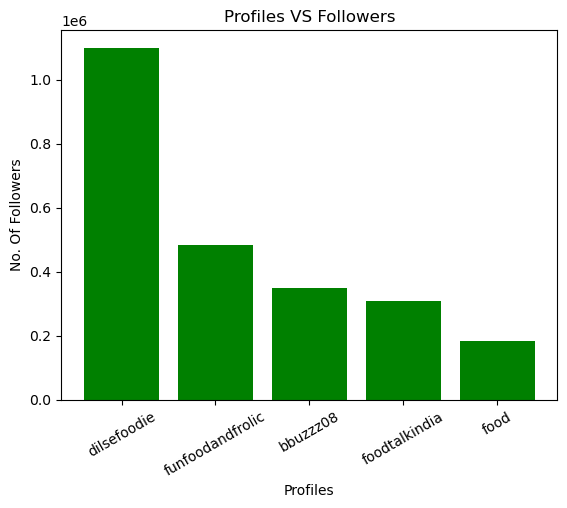

In [25]:
plt.bar(profiles, followers, color = 'green')
plt.xlabel('Profiles')
plt.ylabel('No. Of Followers')
plt.title('Profiles VS Followers')
plt.xticks(rotation = 30)
for i in range(len(profiles)) :
    print(profiles[i], ":" ,followers[i])
plt.show()

In [26]:
profile_vs_posts
profiles = list(profile_vs_posts.keys())
followers = list(profile_vs_posts.values())

dilsefoodie : 10
foodtalkindia : 6
food : 2
bbuzzz08 : 0
funfoodandfrolic : 0


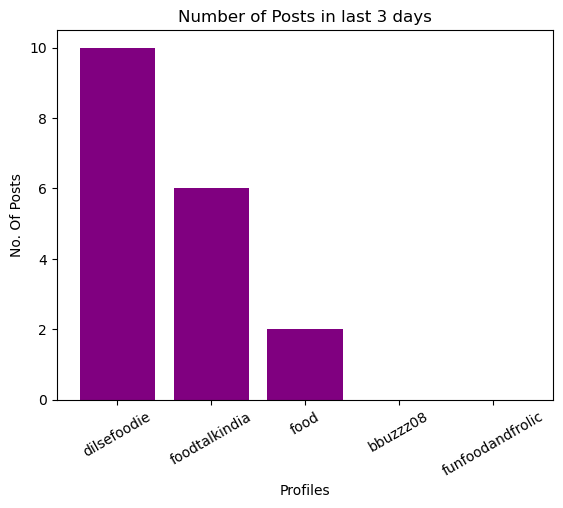

In [27]:
plt.bar(profiles, followers, color = 'purple')
plt.xlabel('Profiles')
plt.ylabel('No. Of Posts')
plt.title('Number of Posts in last 3 days')
plt.xticks(rotation = 30)
for i in range(len(profiles)) :
    print(profiles[i], ":" ,followers[i])
plt.show()

### Problem 2: Your friend also needs a list of hashtags that he should use in his posts.

1. Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.
    
2. Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.
    
3. Create a csv file with two columns : the word and its frequency
    
4. Now, find the hashtags that were most popular among these bloggers
    
5. Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

#### 2.1: Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [28]:
def return_scraped_data(top_5_handles) :
    output = []
    for profile in top_5_handles :
        driver.get(profile)
        posts = get_posts_link()
        get_caption(posts, output)
    return output

In [29]:
def get_posts_link() :
    time.sleep(2)
    current_height = driver.execute_script("return document.body.scrollHeight;")
    time.sleep(2)
    
    while True :
        
        driver.execute_script('window.scrollTo(0, arguments[0])', current_height)
        
        new_height = driver.execute_script("return document.body.scrollHeight;")
        
        wait = WebDriverWait(driver, 10)
        posts = wait.until(EC.presence_of_all_elements_located((By.XPATH, '//article/div/div//a')))
        
        if len(posts) > 10 :
            break
            
        if current_height == new_height :
            break
            
        current_height = new_height
        
    if len(posts) >= 10 :
        posts = posts[0 : 10]
        
    return posts

In [30]:
def get_caption(posts, output) :
    
    for post in posts :
        post.click()
        
        wait = WebDriverWait(driver, 10)
        
        caption_element = wait.until(EC.presence_of_element_located((By.XPATH, "//div[@class = '_a9zs']/h1[starts-with(@class, '_aacl _aaco _aacu _aacx _aad7 _aade')]")))   
        caption = caption_element.text
        
        output.append(caption)
        
        cross_element = wait.until(EC.presence_of_element_located((By.XPATH, "//div[starts-with(@class, 'x160vmok x10l6tqk x1eu8d0j x1vjfegm')]/div[starts-with(@class, 'x1i10hfl x6umtig x1b1mbwd xaqea5y xav7gou x9f619 xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r x16tdsg8 x1hl2dhg xggy1nq x1a2a7pz x6s0dn4 xjbqb8w x1ejq31n xd10rxx x1sy0etr x17r0tee x1ypdohk x78zum5 xl56j7k x1y1aw1k x1sxyh0 xwib8y2 xurb0ha')]"))) 
        cross_element.click()

#### Calling Function

In [31]:
scraped_data = return_scraped_data(top_5_handles)

#### 2.1: Output

In [32]:
for data in scraped_data :
    print(data)

Gwalior Famous Panwadi Poha For Breakfast
Even @kartikaaryan Also Visit Here During Movie Shoots In Gwalior.
#dilsefoodie #dilsecouple #foodie #food #poha
Weather Ki Demand Garma Garam Pakode
Bhai Log Tyaari Shuru Karlo Kadhai Bahar Nikal Lo Mustad Oil Dekhlo Pada Hua Hai Na And Aloo Pyaaz Ya Pala Cut Karke Rakhlo Besan Bhi Check Karlo 😂😂.
#dilsefoodie #dilsecouple #pakode #rain #barish #food #streetfood
100+ Variety Of Achara At 7 Manjila Mandir, Tilak Nagar
#dilsefoodie #dilsecouple #food #achar #streetfood
Finally I Had The Most Popular Butter Chicken By Chef @saranshgoila .

@goilabutterchicken
And If You Wanna Try This Amazing Smokey Butter Chicken Then Order Now On Swiggy And Zomato Its Available Delhi, Gurgaon And Noida 😃.

For Vegetarians I Recommend Must Try Panner Makhani Biryani And Nonveg Walo Tum To Sab Khaa Ke Dekho 😂😂 Maza Ajayega.
#dilsefoodie #goilabutterchicken #chefsaranshgoila #sadakchef #saranshgoila #butterchicken #ohbhaisaab
Ye Hai Jalandhar Ka Omelette King 🤴
#d

#### 2.2: Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [33]:
def get_hashtag_frequency(scraped_data) :
    
    word_list = get_word_list(scraped_data)
    
    hashtags_frequency = get_frequency_from_words(word_list)
    hashtags_frequency = sort_dict(hashtags_frequency)
    hashtags_frequency = dict(reversed(list(hashtags_frequency.items())))
    
    return hashtags_frequency

In [34]:
def get_word_list(scraped_data) :
    word_list = list()
    
    for data in scraped_data :
        data = data.split(' ')
        for word in data :
            if len(word) > 0 and word[0] == '#' :
                word_list.append(word)
    
    return word_list

In [35]:
def get_frequency_from_words(word_list) :
    hashtags_frequency = dict()
    for word in word_list :
        val = hashtags_frequency.get(word)
        if not val :
            hashtags_frequency[word] = 1
        else :
            hashtags_frequency[word] += 1
    return hashtags_frequency

#### Calling Function

In [36]:
hashtags_frequency = get_hashtag_frequency(scraped_data)

#### 2.2: Output

In [37]:
hashtags_frequency

{'#food': 15,
 '#foodtalkindia': 10,
 '#discover': 10,
 '#yummy': 10,
 '#delicious': 10,
 '#bombaybuzzz': 8,
 '#dilsecouple': 7,
 '#reelsinstagram': 7,
 '#delhi': 7,
 '#bbuzzz': 6,
 '#streetfood': 6,
 '#mumbai': 5,
 '#healthychoices': 4,
 '#drinks': 4,
 '#india': 4,
 '#aglassofworldclass': 3,
 '#glutenfreevegan': 3,
 '#NewInTown': 3,
 '#vegetarianmeals': 3,
 '#wccf': 3,
 '#flavours': 3,
 '#foodie': 3,
 '#veganrecipes': 2,
 '#travel': 2,
 '#Eid': 2,
 '#FoodTrail': 2,
 '#CulinaryHeritage': 2,
 '#TasteOfHistory': 2,
 '#healthyrecipes': 2,
 '#snackideas': 2,
 '#mumbaidiaries': 2,
 '#restaurants': 2,
 '#sandwich': 2,
 '#bombay': 2,
 '#eatyourveggies': 2,
 '#veganbreakfast': 2,
 '#nonvegfood': 2,
 '#snackrecipes': 2,
 '#BbuzzzFinds': 2,
 '#cocktails': 2,
 '#bbuzzzfinds': 2,
 '#indianrecipes': 2,
 '#viralfood': 2,
 '#trailmix': 1,
 '#saladideas': 1,
 '#msgfreefood': 1,
 '#onepotmeal': 1,
 '#dinnerideas': 1,
 '#healthysalad': 1,
 '#pulaorecipe': 1,
 '#vegetariansalad': 1,
 '#milletrecipes': 1,

#### 2.3: Create a csv file with two columns : the word and its frequency

In [38]:
dataframe = pd.DataFrame()

In [39]:
hashtags = list(hashtags_frequency.keys())
frequency = list(hashtags_frequency.values())

In [40]:
dataframe['Hashtags'] = hashtags
dataframe['Frequency'] = frequency

In [41]:
dataframe

,Hashtags,Frequency
0,#food,15
1,#foodtalkindia,10
2,#discover,10
3,#yummy,10
4,#delicious,10
...,...,...
211,#hivehostels,1
212,#vileparle,1
213,#mithibai,1
214,#nmims,1


#### 2.3: Output

In [42]:
dataframe.to_csv('Problem-2_part_3-Hashtags_VS_Frequency_InstaBot-Project.csv', index = False)

In [43]:
print('CSV file created !!!')

CSV file created !!!


#### 2.4: Now, find the hashtags that were most popular among these bloggers

In [44]:
top_5_hashtags = dict()
count = 0
for i in list(hashtags_frequency.items()) :
    if count == 5 :
        break
    top_5_hashtags[i[0]] = i[1]
    count += 1

#### 2.4 Output

In [45]:
for key in top_5_hashtags :
    print(key, top_5_hashtags[key])

#food 15
#foodtalkindia 10
#discover 10
#yummy 10
#delicious 10


#### 2.5: Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

In [46]:
hashtag_list = list(top_5_hashtags.keys())
frequency_list = list(top_5_hashtags.values())

In [47]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:d}".format(absolute)

#### 2.5: Output
**Note**: The value inside the pie chart is frequency of words itself and not percentage

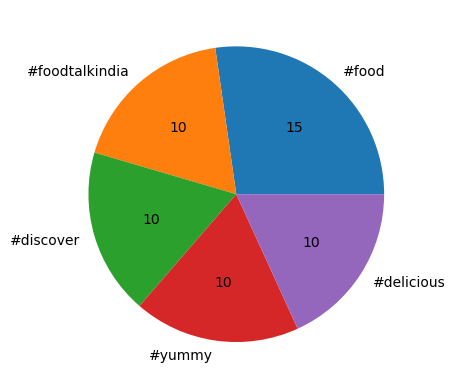

In [48]:
### The value inside the pie chart is frequency of words itself and not percentage
plt.pie(frequency_list, labels = hashtag_list, autopct = lambda pct: func(pct, frequency_list))
plt.show()

### Problem 3: You need to also calculate average followers : likes ratio for the obtained handles. Followers : Likes ratio is calculated as follows:

1. Find out the likes of the top 10 posts of the 5 handles obtained earlier.
2. Calculate the average likes for a handle.
3. Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.    
4. Create a bar graph to depict the above obtained information.

#### 3.1: Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

In [49]:
def get_post_vs_likes(top_5_handles) :
    output = list()
    for profile in top_5_handles :
        driver.get(profile)
        posts = get_posts_link()
        post_vs_likes = dict()
        post_vs_likes['names'] = get_account_name(profile)
        for i in range(len(posts)) :
            post = posts[i]
            likes = get_likes_from_post(post)
            post_vs_likes[i + 1] = likes
        output.append(post_vs_likes)
    return output

In [50]:
def get_likes_from_post(post) :
    post.click()
    wait = WebDriverWait(driver, 2)
    cross_element = wait.until(EC.presence_of_element_located((By.XPATH, "//div[starts-with(@class, 'x160vmok x10l6tqk x1eu8d0j x1vjfegm')]/div[starts-with(@class, 'x1i10hfl x6umtig x1b1mbwd xaqea5y xav7gou x9f619 xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r x16tdsg8 x1hl2dhg xggy1nq x1a2a7pz x6s0dn4 xjbqb8w x1ejq31n xd10rxx x1sy0etr x17r0tee x1ypdohk x78zum5 xl56j7k x1y1aw1k x1sxyh0 xwib8y2 xurb0ha')]"))) 
    
    try :
        
        likes = wait.until(EC.presence_of_element_located((By.XPATH, "//a/span[starts-with(@class, 'x193iq5w xeuugli x1fj9vlw x13faqbe x1vvkbs xt0psk2 x1i0vuye xvs91rp x1s688f x5n08af x10wh9bi x1wdrske x8viiok x18hxmgj')]/span")))
        likes = likes.text
        likes = int(likes.replace(',',''))
        cross_element.click()
        return likes
    
    except :
        
        cross_element.click()
        return 'No data available'
    

#### Calling Function

In [51]:
post_vs_likes = get_post_vs_likes(top_5_handles)

#### 3.1: Output
**Note**: Here 'No data available' means that the profile has restricted the view of Likes for users

In [52]:
for myDict in post_vs_likes :
    print(myDict['names'])
    print()
    print('Post_number : Like_count')
    print()
    for key in myDict :
        if key == 'names' :
            continue
        print(key, ':' , myDict[key])
    print()

dilsefoodie

Post_number : Like_count

1 : No data available
2 : 5905
3 : 4379
4 : 7611
5 : 4871
6 : 11304
7 : 7593
8 : 16461
9 : 2955
10 : 5716

funfoodandfrolic

Post_number : Like_count

1 : 1028
2 : 1330
3 : 4362
4 : 4133
5 : 2040
6 : 4437
7 : 15861
8 : 4855
9 : 1404
10 : 6075

bbuzzz08

Post_number : Like_count

1 : 355714
2 : 16185
3 : 92318
4 : No data available
5 : 230931
6 : 2022
7 : 2597
8 : 4360
9 : 86299
10 : 1387

foodtalkindia

Post_number : Like_count

1 : 114
2 : 173
3 : 172
4 : 458
5 : 218
6 : 338
7 : 391
8 : 1147
9 : 418
10 : 251

food

Post_number : Like_count

1 : No data available
2 : No data available
3 : No data available
4 : No data available
5 : No data available
6 : No data available
7 : No data available
8 : 91
9 : No data available
10 : No data available



#### 3.2: Calculate the average likes for a handle.
**Note**: Ignoring Nan Values and only takin average for only those whose values are present.

In [53]:
for i in range(len(post_vs_likes)) :
    myDict = post_vs_likes[i]
    count = 0
    for key in myDict :
        if key == 'names' or myDict[key] == 'No data available':
            continue
        count += 1
    total = 0
    for key in myDict :
        if key == 'names' or myDict[key] == 'No data available':
            continue
        total += myDict[key]
    
    post_vs_likes[i] = dict()
    post_vs_likes[i]['names'] = myDict['names']
    if count == 0 :
        avg = 0
    else :
        avg = total / count
    post_vs_likes[i]['avg'] = avg

In [54]:
post_vs_avg = post_vs_likes.copy()

#### 3.2: Output

In [55]:
for myDict in post_vs_avg :
    print(myDict['names'])
    for key in myDict :
        if key == 'names' :
            continue
        print(key, ':' , myDict[key])
    print()

dilsefoodie
avg : 7421.666666666667

funfoodandfrolic
avg : 4552.5

bbuzzz08
avg : 87979.22222222222

foodtalkindia
avg : 368.0

food
avg : 91.0



#### 3.3: Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle

In [56]:
followers_count = list(top_5_handles_vs_followers.values())
average_count = []
for myDict in post_vs_avg :
    average_count.append(myDict['avg'])

In [57]:
ratio = []
for i in range(5) :
    f_count = followers_count[i]
    avg_count = average_count[i]
    
    if avg_count == 0 :
        ratio.append(0)
    else :
        ratio.append(f_count/avg_count)

#### 3.3: Output

In [58]:
ratio = sorted(ratio)
ratio = ratio[::-1]
for r in ratio :
    print(r)

2000.0
839.6739130434783
148.2146867280485
106.09555189456343
3.9554793871785385


#### 3.4: Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle

In [59]:
post_vs_avg
names = []
likes_counts_avg = []
for myDict in post_vs_avg :
    names.append(myDict['names'])
    likes_counts_avg.append(myDict['avg'])

#### 3.4: Output

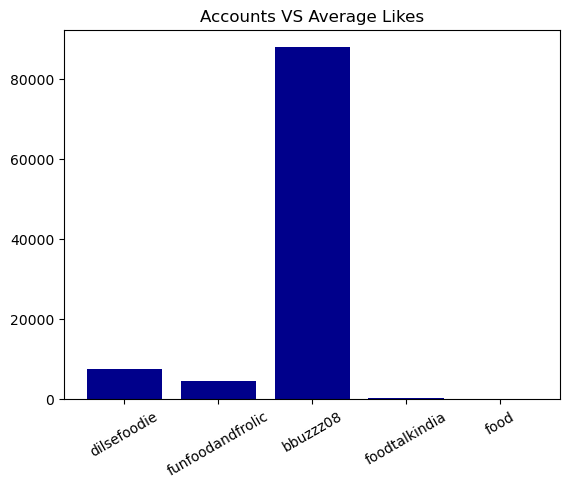

In [60]:
plt.bar(names, likes_counts_avg, color = 'darkblue')
plt.xticks(rotation = 30)
plt.title('Accounts VS Average Likes')
plt.show()

### SUBMITTED BY - PRATEEK SARNA